Cleaning Data untuk Data Text

In [1]:
import pandas as pd
df = pd.read_csv("dataset_tiktok-scraper_2025-10-14_02-50-51-484.csv")
df

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,collectCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl
0,https://p16-common-sign.tiktokcdn-us.com/tos-a...,lahsemasa,#mbg #mbglovers❤️,92300,8906,878400,159,3654,9,COULD BE WRONG,LOSTBOYJAY,False,2025-09-15T03:07:33.000Z,https://www.tiktok.com/@lahsemasa/video/755014...
1,https://p16-common-sign.tiktokcdn-us.com/tos-a...,wartabromo,Belatung ditemukan dalam menu Program Makan Be...,176500,35100,9800000,9820,12600,42,Minimal for news / news suspense(1169746),Hiraoka Kotaro,False,2025-09-26T12:44:24.000Z,https://www.tiktok.com/@wartabromo/video/75543...
2,https://p16-common-sign.tiktokcdn-us.com/tos-a...,theeclipse.x,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,94,8,1981,0,0,8,La Boda,Camilo,False,2025-10-13T07:09:26.000Z,https://www.tiktok.com/@theeclipse.x/video/756...
3,https://p16-common-sign.tiktokcdn-us.com/tos-a...,voiceofradenvx,MBG,2623,588,42900,58,351,9,original sound - VoiceofRadenVX | Voice Actor,VoiceofRadenVX | Voice Actor,True,2025-09-19T05:10:54.000Z,https://www.tiktok.com/@voiceofradenvx/video/7...
4,https://p16-common-sign.tiktokcdn-us.com/tos-a...,weearee..xeight,#fyppppppppppppppppppppppp #keracunanmbg #mbg,9447,883,635300,222,351,13,suara asli - RAHMAN WALLY,CRW,True,2025-09-30T05:14:00.000Z,https://www.tiktok.com/@weearee..xeight/video/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,dewiharnum92,Butuh 10 😆 buat suap yang picky eater 🤣 #mbg #...,33,9,1620,3,4,14,Monkeyshine-JP,Lt FitzGibbons Men,False,2025-10-08T04:38:24.000Z,https://www.tiktok.com/@dewiharnum92/video/755...
501,https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...,nine_asikk,mbg baru datang nih🥰🥰#ixa #spensabri #mbg #smp...,63,70,2876,6,1,13,suara asli - ALROSTA OFFC,ALROSTA OFFC,True,2025-10-13T07:54:52.000Z,https://www.tiktok.com/@nine_asikk/video/75606...
502,https://p19-common-sign-useastred.tiktokcdn-eu...,smkn1kragilan.official,#mbg #makanbergizigratis #fyp #foryoupage,272,76,19700,5,7,9,QKThr,Aphex Twin,False,2025-10-13T02:30:20.000Z,https://www.tiktok.com/@smkn1kragilan.official...
503,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,call..me_adam,#MBG#fyppppppp,50,9,1763,52,3,14,suara asli - BEE,BEE,True,2025-10-13T04:14:21.000Z,https://www.tiktok.com/@call..me_adam/video/75...


PROSES CLEANING

In [2]:
import re
import string
import nltk

In [3]:
df_dropcolumns = df.drop(['authorMeta.avatar',	'authorMeta.name', 'diggCount',	'shareCount',	'playCount',	'commentCount',	'collectCount',	'videoMeta.duration',	'musicMeta.musicName',	'musicMeta.musicAuthor',	'musicMeta.musicOriginal',	'createTimeISO',	'webVideoUrl'], axis=1)
df_dropcolumns

,text
0,#mbg #mbglovers❤️
1,Belatung ditemukan dalam menu Program Makan Be...
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...
3,MBG
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg
...,...
500,Butuh 10 😆 buat suap yang picky eater 🤣 #mbg #...
501,mbg baru datang nih🥰🥰#ixa #spensabri #mbg #smp...
502,#mbg #makanbergizigratis #fyp #foryoupage
503,#MBG#fyppppppp


hapus data bernilai kosong

In [4]:
data = df_dropcolumns.dropna()
print(f"Total data setelah drop NA: {len(data)}")

Total data setelah drop NA: 498


In [5]:
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Menghapus HTML tag
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile('['
            u'\U0001F600-\U0001F64F'  # emoticons
            u'\U0001F300-\U0001F5FF'  # symbols & pictographs
            u'\U0001F680-\U0001F6FF'  # transport & map symbols
            u'\U0001F700-\U0001F77F'  # alchemical symbols
            u'\U0001F780-\U0001F7FF'  # geometric shapes extended
            u'\U0001F800-\U0001F8FF'  # supplemental arrows-c
            u'\U0001F900-\U0001F9FF'  # supplemental symbols & pictographs
            u'\U0001FA00-\U0001FA6F'  # chess symbols
            u'\U0001FA70-\U0001FAFF'  # pictographs extended-A
            u'\U0001F004-\U0001F0CF'  # additional emoticons
            u'\U0001F1E0-\U0001F1FF'  # flags
            ']+', flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text

def remove_punctuation(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    return tweet

def remove_extra_whitespace(text):
    if isinstance(text, str):
        return ' '.join(text.split())
    return text


# --- Proses Cleaning ---

data['cleaning'] = data['text'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_usernames(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_punctuation(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_extra_whitespace(x))

data.head(5)


/tmp/ipython-input-2813005524.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaning'] = data['text'].apply(lambda x: remove_URL(x))
/tmp/ipython-input-2813005524.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaning'] = data['cleaning'].apply(lambda x: remove_usernames(x))
/tmp/ipython-input-2813005524.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,text,cleaning
0,#mbg #mbglovers❤️,mbg mbglovers
1,Belatung ditemukan dalam menu Program Makan Be...,Belatung ditemukan dalam menu Program Makan Be...
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,Day One MBG mbg kontenmbg daymbg smansawaingap...
3,MBG,MBG
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg,fyppppppppppppppppppppppp keracunanmbg mbg


CASE FOLDING

In [6]:
def case_folding(text):
  if isinstance(text, str):
    return text.lower()
  else:
    return text

data['case_folding'] = data['cleaning'].apply(case_folding)
data.head(5)

/tmp/ipython-input-361776155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['case_folding'] = data['cleaning'].apply(case_folding)


,text,cleaning,case_folding
0,#mbg #mbglovers❤️,mbg mbglovers,mbg mbglovers
1,Belatung ditemukan dalam menu Program Makan Be...,Belatung ditemukan dalam menu Program Makan Be...,belatung ditemukan dalam menu program makan be...
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,Day One MBG mbg kontenmbg daymbg smansawaingap...,day one mbg mbg kontenmbg daymbg smansawaingap...
3,MBG,MBG,mbg
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg,fyppppppppppppppppppppppp keracunanmbg mbg,fyppppppppppppppppppppppp keracunanmbg mbg


NORMALISASI KATA

In [7]:
import pandas as pd
import requests
from io import BytesIO

def normalize_text(text, kamus_tidak_baku):
    """Normalisasi kata tidak baku menjadi kata baku"""
    if isinstance(text, str):
        words = text.split()
        normalized_words = [kamus_tidak_baku.get(word, word) for word in words]
        return ' '.join(normalized_words)
    return ''

In [8]:
#unduh dan baca kamus dari github
kamus_data = pd.read_excel('kamuskatabakulengkap.xlsx')

#dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))


In [9]:
dataclean = pd.DataFrame(data[['text', 'cleaning', 'case_folding']])
dataclean['normalisasi'] = dataclean['case_folding'].apply(
    lambda x: normalize_text(x, kamus_tidak_baku_dict)
)

df = pd.DataFrame(dataclean[['text', 'cleaning', 'case_folding', 'normalisasi']])
df

,text,cleaning,case_folding,normalisasi
0,#mbg #mbglovers❤️,mbg mbglovers,mbg mbglovers,makan bergizi gratis mbglovers
1,Belatung ditemukan dalam menu Program Makan Be...,Belatung ditemukan dalam menu Program Makan Be...,belatung ditemukan dalam menu program makan be...,belatung ditemukan dalam menu program makan be...
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,Day One MBG mbg kontenmbg daymbg smansawaingap...,day one mbg mbg kontenmbg daymbg smansawaingap...,day one makan bergizi gratis makan bergizi gra...
3,MBG,MBG,mbg,makan bergizi gratis
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg,fyppppppppppppppppppppppp keracunanmbg mbg,fyppppppppppppppppppppppp keracunanmbg mbg,fyppppppppppppppppppppppp keracunanmbg makan b...
...,...,...,...,...
500,Butuh 10 😆 buat suap yang picky eater 🤣 #mbg #...,Butuh buat suap yang picky eater mbg mbgcore k...,butuh buat suap yang picky eater mbg mbgcore k...,butuh buat suap yang picky eater makan bergizi...
501,mbg baru datang nih🥰🥰#ixa #spensabri #mbg #smp...,mbg baru datang nihixa spensabri mbg smpnbring...,mbg baru datang nihixa spensabri mbg smpnbring...,makan bergizi gratis baru datang nihixa spensa...
502,#mbg #makanbergizigratis #fyp #foryoupage,mbg makanbergizigratis fyp foryoupage,mbg makanbergizigratis fyp foryoupage,makan bergizi gratis makanbergizigratis fyp fo...
503,#MBG#fyppppppp,MBGfyppppppp,mbgfyppppppp,mbgfyppppppp


TOKENIZATION

In [10]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df

,text,cleaning,case_folding,normalisasi,tokenize
0,#mbg #mbglovers❤️,mbg mbglovers,mbg mbglovers,makan bergizi gratis mbglovers,"[makan, bergizi, gratis, mbglovers]"
1,Belatung ditemukan dalam menu Program Makan Be...,Belatung ditemukan dalam menu Program Makan Be...,belatung ditemukan dalam menu program makan be...,belatung ditemukan dalam menu program makan be...,"[belatung, ditemukan, dalam, menu, program, ma..."
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,Day One MBG mbg kontenmbg daymbg smansawaingap...,day one mbg mbg kontenmbg daymbg smansawaingap...,day one makan bergizi gratis makan bergizi gra...,"[day, one, makan, bergizi, gratis, makan, berg..."
3,MBG,MBG,mbg,makan bergizi gratis,"[makan, bergizi, gratis]"
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg,fyppppppppppppppppppppppp keracunanmbg mbg,fyppppppppppppppppppppppp keracunanmbg mbg,fyppppppppppppppppppppppp keracunanmbg makan b...,"[fyppppppppppppppppppppppp, keracunanmbg, maka..."
...,...,...,...,...,...
500,Butuh 10 😆 buat suap yang picky eater 🤣 #mbg #...,Butuh buat suap yang picky eater mbg mbgcore k...,butuh buat suap yang picky eater mbg mbgcore k...,butuh buat suap yang picky eater makan bergizi...,"[butuh, buat, suap, yang, picky, eater, makan,..."
501,mbg baru datang nih🥰🥰#ixa #spensabri #mbg #smp...,mbg baru datang nihixa spensabri mbg smpnbring...,mbg baru datang nihixa spensabri mbg smpnbring...,makan bergizi gratis baru datang nihixa spensa...,"[makan, bergizi, gratis, baru, datang, nihixa,..."
502,#mbg #makanbergizigratis #fyp #foryoupage,mbg makanbergizigratis fyp foryoupage,mbg makanbergizigratis fyp foryoupage,makan bergizi gratis makanbergizigratis fyp fo...,"[makan, bergizi, gratis, makanbergizigratis, f..."
503,#MBG#fyppppppp,MBGfyppppppp,mbgfyppppppp,mbgfyppppppp,[mbgfyppppppp]


STOPWORD REMOVAL

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

#ubah hasil list jadi string
df['stopword removal'] = df['tokenize'].apply(
    lambda x: ' '.join(remove_stopwords(x))
)

df

SyntaxError: invalid syntax (ipython-input-3842653076.py, line 4)

Stemming

In [13]:
!pip install Sastrawi

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_tokens(tokens):
    if isinstance(tokens, list):
        stemmed_words = [stemmer.stem(word) for word in tokens]
        return ' '.join(stemmed_words)
    elif isinstance(tokens, str):
        words = tokens.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    return ''

df['stemming'] = df['stopword removal'].apply(stemming_tokens)
df[['text', 'stopword removal', 'stemming']].head()

,text,stopword removal,stemming
0,#mbg #mbglovers❤️,makan bergizi gratis mbglovers,makan gizi gratis mbglovers
1,Belatung ditemukan dalam menu Program Makan Be...,belatung ditemukan menu program makan bergizi ...,belatung temu menu program makan gizi gratis m...
2,Day One MBG 😘😘 #mbg #kontenmbg #day1mbg #smans...,day one makan bergizi gratis makan bergizi gra...,day one makan gizi gratis makan gizi gratis ko...
3,MBG,makan bergizi gratis,makan gizi gratis
4,#fyppppppppppppppppppppppp #keracunanmbg #mbg,fyppppppppppppppppppppppp keracunanmbg makan b...,fyppppppppppppppppppppppp keracunanmbg makan g...


n-gram

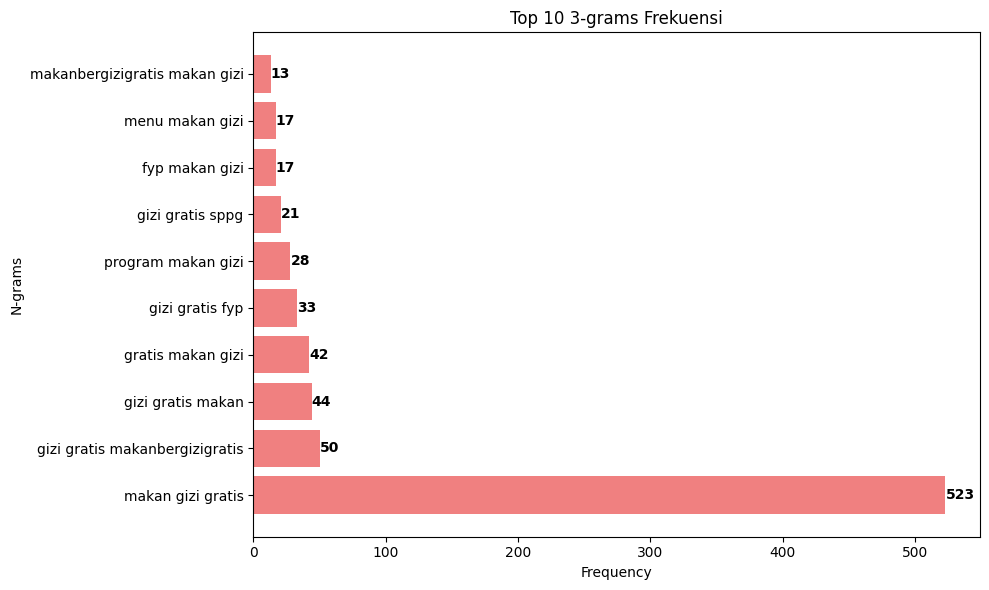

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

#fungsi untuk membuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n=10, color='skyblue'):
  vectorizer = CountVectorizer(ngram_range=ngram_range)
  X = vectorizer.fit_transform(texts)

  #hitung total frekuensi setiap n-gram
  ngram_counts = X.sum(axis=0).A1
  ngram_vocab = vectorizer.get_feature_names_out()
  freq_dist = dict(zip(ngram_vocab, ngram_counts))

  #ambil n-gram dengan frekuensi tertinggi
  top_ngrams = Counter(freq_dist).most_common(top_n)
  labels, values = zip(*top_ngrams)

  #visualisasi
  plt.figure(figsize=(10,6))
  bars = plt.barh(labels[::-1], values[::-1], color=color)
  plt.title(f'Top {top_n} {ngram_range[0]}-grams Frekuensi')
  plt.xlabel('Frequency')
  plt.ylabel('N-grams')
  plt.gca().invert_yaxis()

  #add labels at the end of each bar
  for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontweight='bold')

  plt.tight_layout()
  plt.show()

#visualisasi 3-gram
plot_ngram_frequencies(df['stemming'], ngram_range=(3,3), top_n=10, color='lightcoral')


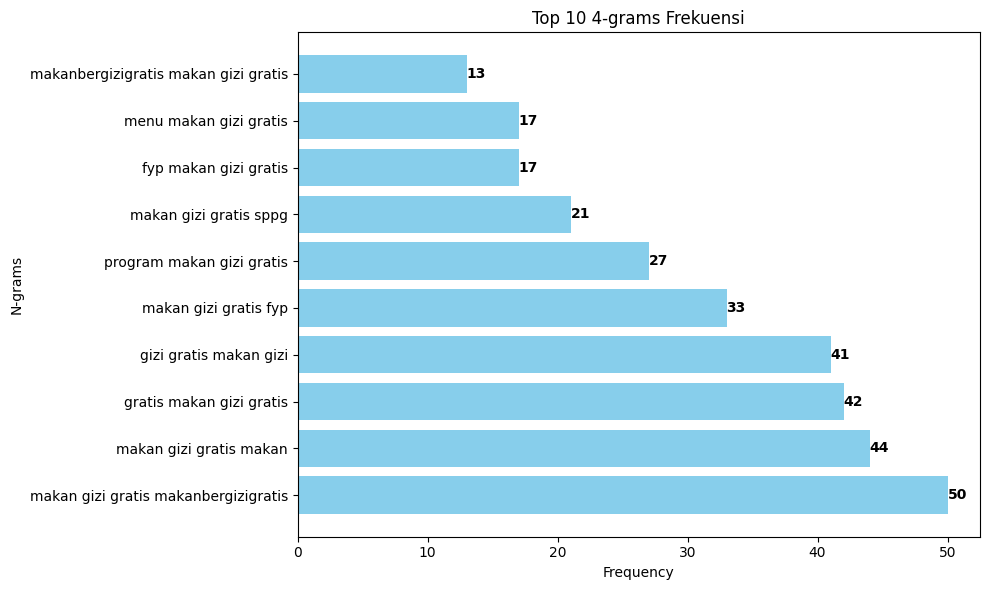

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

#daftar stopwords tambahan
custom_stopwords = ['https', 'co', 'RT', '...', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs', 'kayak',
                    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
                    'ajar', 'si', 'ok', 'gas']

#fungsi untuk memnbuat diagram batang frekuensi n-gram
def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n=10, color='skyblue'):
  vectorizer = CountVectorizer(ngram_range=ngram_range)
  X = vectorizer.fit_transform(texts)

  #hitung total frekuensi setiap n-gram
  ngram_counts = X.sum(axis=0).A1
  ngram_vocab = vectorizer.get_feature_names_out()
  freq_dist = dict(zip(ngram_vocab, ngram_counts))

  #ambil n-gram dengan frekuensi tertinggi
  top_ngrams = Counter(freq_dist).most_common(top_n)
  labels, values = zip(*top_ngrams)

  #visualisasi
  plt.figure(figsize=(10,6))
  bars = plt.barh(labels[::-1], values[::-1], color=color)
  plt.title(f'Top {top_n} {ngram_range[0]}-grams Frekuensi')
  plt.xlabel('Frequency')
  plt.ylabel('N-grams')
  plt.gca().invert_yaxis()

  #add labels at the end of each bar
  for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontweight='bold')

  plt.tight_layout()
  plt.show()

plot_ngram_frequencies(df['stemming'], ngram_range=(4,4), top_n=10, color='skyblue')

wordcloud

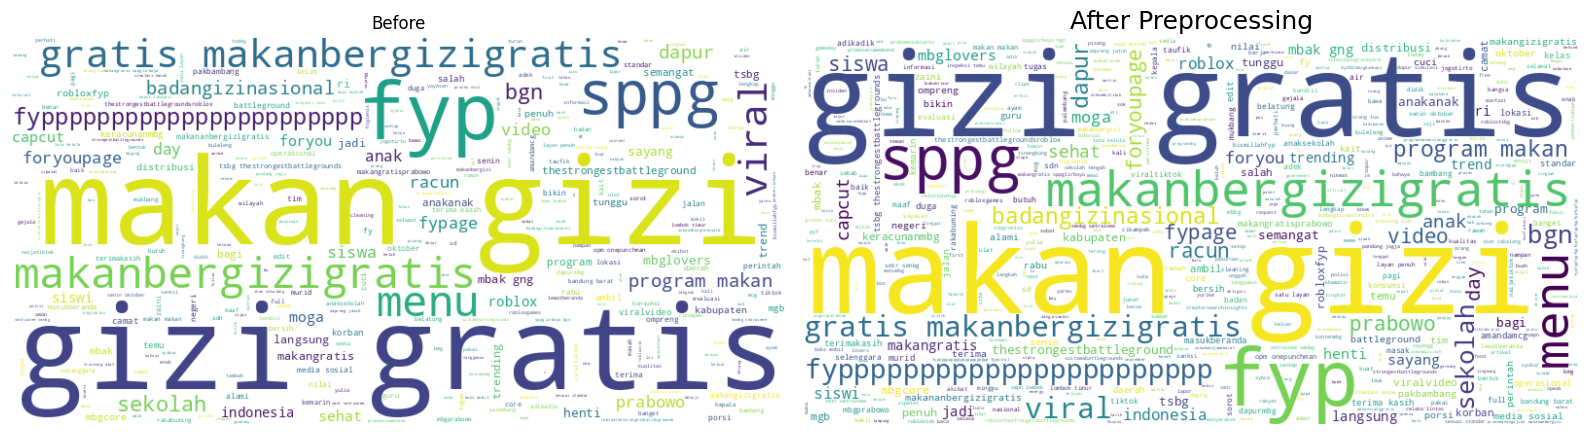

In [22]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT','...', 'amp', 'lu','deh', 'ya', 'gue', 'cs', 'kayak',
                    'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk',
                    'ajar', 'si', 'ok', 'gas'])

text_before = ' '.join(
    df['stemming']
    .astype(str)
    .tolist()
)

wc_before = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400
).generate(text_before)

#wordcloud after
text_after = ' '.join(
    [' '.join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split()) for x in df['stemming'].astype(str)]
)
wc_after = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400
).generate(text_after)

#visualisasi side by side
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(wc_before, interpolation='bilinear')
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_after, interpolation='bilinear')
plt.title('Before')
plt.axis('off')
plt.title('After Preprocessing', fontsize=18)

plt.tight_layout()
plt.show()